<font size=5> Task 2: Approximating linear vector fields </font> 

In [3]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp

from task2_utils import *

<font size=5> # Load and plot the datasets </font>

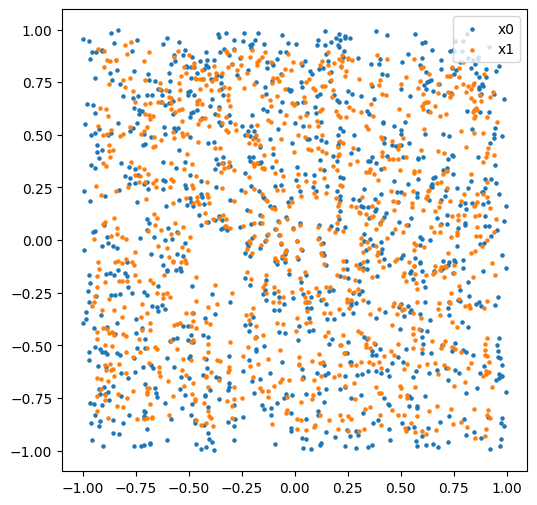

In [4]:
# load the datasets "linear vectorfield data x0.txt" 
# and "linear vectorfield data x1.txt"
x0, x1 = load_data()

# save both datasets in a dictionary
data_dict = {"x0":x0, "x1":x1}

# plot both datasets in one figure
plot_datasets(data_dict)

<font size=5> # Part 1: Estimate the linear vector field that was used to generate the points x1 from the points x0 </font> 

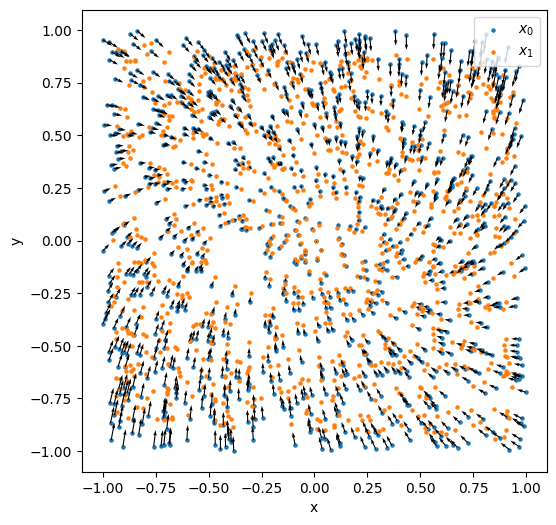

In [5]:
# set the time step ∆t
delta_t = 0.1

# estimate the vectors v(k) at all points x0(k)
v = estimate_vectors(delta_t)

# plot approximate vector field within the domain of the x0, x1 datasets
plot_approximate_vector_field(x0, x1, v)

In [6]:
# approximate the matrix A using least-squares minimization
A = approximate_matrix(x0, v)
# print the matrix A
print(A)

[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


<font size=5> # Part 2: Solve the linear system and compute the mean squared error </font> 

In [7]:
# Define the linear system of differential equations
def linear_system(t, x):
    return A@x

# set the value of t_end 
t_end = delta_t

# compute MSE using the defined linear system and the solve_ivp function
mse, x1_estimated = compute_mse(linear_system, x0, x1, A, t_end)

Mean Squared Error: 0.0015299637979948664


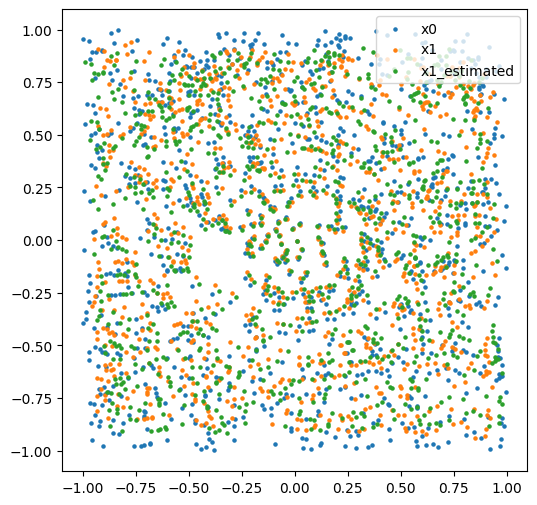

In [9]:
# save all data in a dictionary
data_dict = {"x0":x0, "x1":x1, "x1_estimated":x1_estimated}

# plot normal scatter plot for x0, x1, and x1_estimated in one figure
plot_datasets(data_dict)

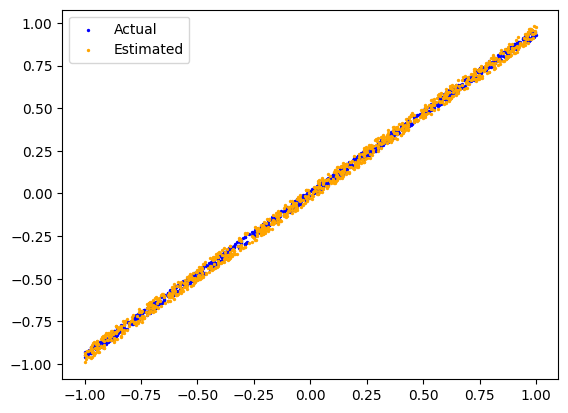

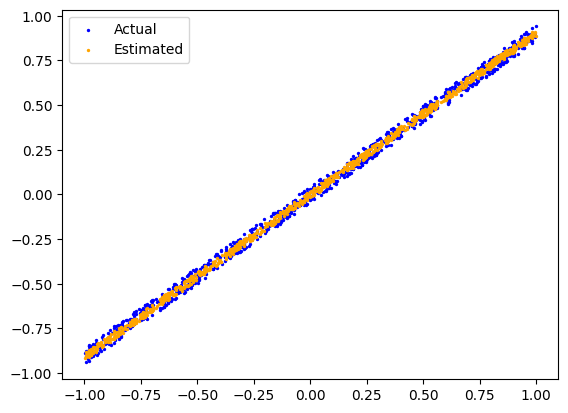

In [10]:
# visually compare the original points with the estimated points 
# in each dimension separately.
plot_each_dimension(x0, x1, x1_estimated)

<font size=5> # Part 3: Visualizes the trajectory and the phase portrait when the initial point is (10, 10) </font> 

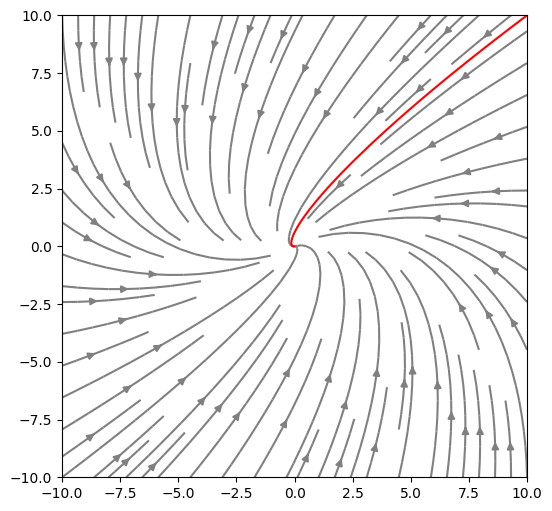

In [11]:
# set the value of t_end as 100
t_end = 100

# set the initial point as (10, 10)
initial_point = (10, 10)

# set the value of t_eval
t_eval=np.linspace(0, 100, 1000)

# visualizes the trajectory and the phase portrait
visualize_traj_phase_portrait(linear_system, A, t_end, initial_point)